Computing symbolic Peano–Baker series and printing partial sums...
Partial sum term 0 (Identity matrix):
⎡1  0⎤
⎢    ⎥
⎣0  1⎦

----------------------------

Partial sum after term 1:
⎡t + 1    0  ⎤
⎢            ⎥
⎣  0    t + 1⎦

----------------------------

Partial sum after term 2:
⎡ 2                    ⎤
⎢t                     ⎥
⎢── + t + 1      0     ⎥
⎢2                     ⎥
⎢                      ⎥
⎢             2        ⎥
⎢            t         ⎥
⎢    0       ── + t + 1⎥
⎣            2         ⎦

----------------------------

Partial sum after term 3:
⎡ 3    2                         ⎤
⎢t    t                          ⎥
⎢── + ── + t + 1         0       ⎥
⎢6    2                          ⎥
⎢                                ⎥
⎢                  3    2        ⎥
⎢                 t    t         ⎥
⎢       0         ── + ── + t + 1⎥
⎣                 6    2         ⎦

----------------------------

Partial sum after term 4:
⎡ 4    3    2                              ⎤
⎢t    t    t    

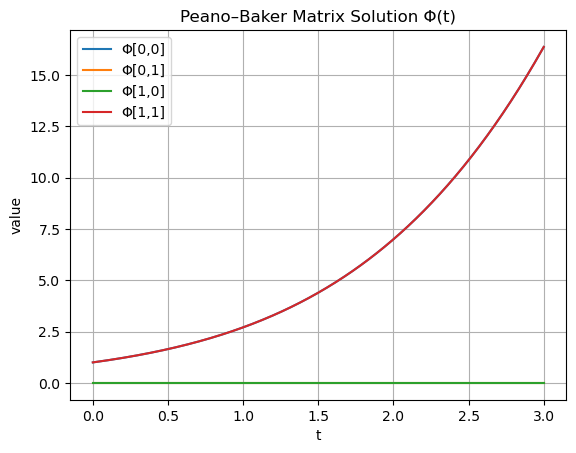

In [5]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

def peano_baker_series_symbolic(A_func, t0, t, num_terms):
    """
    Compute a symbolic Peano–Baker series for a given A(t)
    """
    n = A_func(t0).shape[0]
    I = eye(n)

    def nested_integral(k):
        if k == 0:
            return I

        taus = symbols(f"tau1:{k+1}", real=True)

        expr = A_func(taus[0])
        for i in range(1, k):
            expr = expr @ A_func(taus[i])

        integral = expr
        for i in reversed(range(k)):
            upper = t if i == 0 else taus[i - 1]
            integral = integrate(integral, (taus[i], t0, upper))

        return integral

    Phi = I
    print("Partial sum term 0 (Identity matrix):")
    pprint(Phi)
    print("\n----------------------------\n")

    for k in range(1, num_terms):
        term = nested_integral(k)
        Phi += term
        print(f"Partial sum after term {k}:")
        pprint(Phi)
        print("\n----------------------------\n")

    return simplify(Phi)

def lambdify_matrix(symbolic_matrix, symbol):
    """Return a 2D array of lambdified element-wise functions."""
    rows, cols = symbolic_matrix.shape
    return [[lambdify(symbol, symbolic_matrix[i, j], "numpy")
             for j in range(cols)]
            for i in range(rows)]

def evaluate_matrix_function(f_matrix, t_vals):
    """Evaluate a matrix of functions entrywise over t_vals."""
    rows = len(f_matrix)
    cols = len(f_matrix[0])
    out = np.zeros((rows, cols, len(t_vals)))

    for i in range(rows):
        for j in range(cols):
            out[i, j, :] = f_matrix[i][j](t_vals)

    return out

def plot_matrix_function(Phi_vals, t_vals, title="Matrix elements Φ(t)"):
    rows, cols, _ = Phi_vals.shape
    for i in range(rows):
        for j in range(cols):
            plt.plot(t_vals, Phi_vals[i, j, :], label=f"Φ[{i},{j}]")

    plt.xlabel("t")
    plt.ylabel("value")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


if __name__ == "__main__":
    t = Symbol('t', real=True)
    t0 = 0

    def A(tau): #input your desired A matrix here
        return Matrix([
            [1, 0],
            [0,1],
        ])

    num_terms = 5  #input your desired number of terms here

    print("Computing symbolic Peano–Baker series and printing partial sums...")
    Phi_sym = peano_baker_series_symbolic(A, t0, t, num_terms)

    print("\nFinal symbolic Φ(t) approximation:")
    pprint(Phi_sym)

    Phi_func = lambdify_matrix(Phi_sym, t)

    t_vals = np.linspace(0, 3, 400) #change the starting time, ending time, and number of points (respectively) over which the STM elements are plotted here

    Phi_vals = evaluate_matrix_function(Phi_func, t_vals)

    plot_matrix_function(Phi_vals, t_vals, title="Peano–Baker Matrix Solution Φ(t)")
